# EURASIP FIGURE

### Durations (plt version)

In [104]:
from matplotlib import pyplot as plt

C:\Users\SER\AppData\Local\Temp\ipykernel_12492\1610256936.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45, fontsize="large", horizontalalignment="right")  # , fontweight="bold"


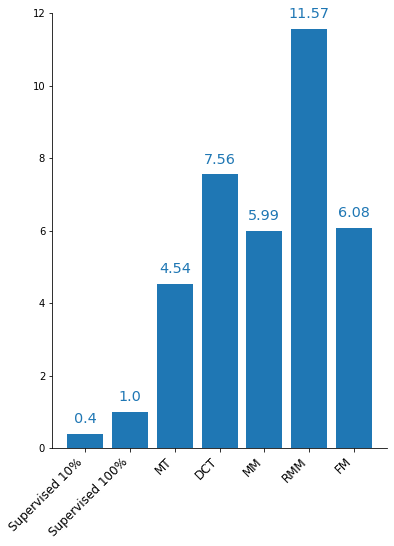

In [116]:
data = {
    "Supervised 10%": 0.40,
    "Supervised 100%": 1.00,
    "MT": 4.54,
    "DCT": 7.56,
    "MM": 5.99,
    "RMM": 11.57,
    "FM": 6.08,
}
x = list(data.keys())
y = list(data.values())

fig = plt.figure(figsize=(6, 8), edgecolor="white")
ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(
        i,
        v + 0.3,
        str(v),
        color="C0",
        horizontalalignment="center",
        fontweight="normal",
        fontsize="x-large",
    )

ax.set_ylim([0, 12])
ax.set_xticklabels(
    x, rotation=45, fontsize="large", horizontalalignment="right"
)  # , fontweight="bold"

directory = "./"
fig.savefig(directory + "Durations_v5.eps", format="eps", bbox_inches="tight")
fig.savefig(directory + "Durations_v5.pdf", format="pdf", bbox_inches="tight")
fig.savefig(directory + "Durations_v5.png", format="png", bbox_inches="tight")
plt.show()

### Durations (bokeh version)

In [7]:
from typing import Optional, Union

from bokeh.io.export import export_svg
from bokeh.models import Range1d, PrintfTickFormatter, Legend, Plot, HoverTool, ColumnDataSource, LabelSet
from bokeh.palettes import all_palettes
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [44]:
def plot_categorical(
    hist_values: Union[dict[str, int], dict[str, float]],
    x_name: str,
    y_name: str,
    title: Optional[str],
    width: int = 400,
    height: int = 400,
    txt_size: int = 10,
    add_labels: bool = False,
    use_colors: bool = True,
) -> Plot:
    hist_values = {str(k): v for k, v in hist_values.items()}
    data = {
        x_name: list(hist_values.keys()),
        y_name: list(hist_values.values()),
    }

    palette = "Category10"
    n_bars = len(hist_values)
    if (
        use_colors
        and palette in all_palettes.keys()
        and n_bars in all_palettes[palette].keys()
    ):
        data["color"] = all_palettes[palette][len(hist_values)]
        color_name = "color"  # reference to color column
    else:
        color_name = "#2b83ba"  # 'lightsteelblue'

    source = ColumnDataSource(data=data)
    hover = HoverTool(tooltips=[(x_name, f"@{x_name}"), (y_name, f"@{y_name}")])

    p = figure(
        x_range=data[x_name],
        y_range=(0, max(data[y_name]) * 1.1),
        frame_width=width,
        frame_height=height,
        title=title,
        toolbar_location="right",
    )
    p.add_tools(hover)
    p.xaxis.major_label_text_font_size = f"{txt_size}px"
    p.xaxis.major_label_text_font_style = 'bold'

    if add_labels:
        labels = LabelSet(
            x=x_name,
            y=y_name,
            text=y_name,
            source=source,
            text_font_size=f"{txt_size}px",
            text_font_style="bold",
            text_color=color_name,
            text_align="center",
            y_offset=10,
        )
        p.add_layout(labels)

    p.vbar(x=x_name, top=y_name, width=0.9, color=color_name, source=source)
    show(p)

    return p

In [47]:
data = {
    "SUP10": 0.40,
    "SUP100": 1.00,
    "PL": 0.0,
    "MT": 4.54,
    # "DCT": 7.56,
    "MM": 5.99,
    "RMM": 11.57,
    "FM": 6.08,
    "UDA": 0.0,
}
p = plot_categorical(data, "x", "y", None, 500, 500, 15, True, False)

In [48]:
import os.path as osp
import subprocess as sp
from typing import Optional
from bokeh.models import Plot
from selenium.webdriver import Firefox

def full_export_to_pdf(
    p: Plot,
    name: str,
    dir: str = "nb_data",
    width: Optional[int] = None,
    height: Optional[int] = None,
) -> None:
    p.output_backend = "svg"  # type: ignore

    svg_fpath = osp.join(dir, name) + ".svg"
    pdf_fpath = osp.join(dir, name) + ".pdf"

    driver = Firefox()
    export_svg(p, filename=svg_fpath, webdriver=driver, width=width, height=height)
    driver.close()

    fname_noext = "nb_data/beta_distributions"
    _ = sp.check_call(f"inkscape {svg_fpath} --export-pdf={pdf_fpath}".split())

In [49]:
full_export_to_pdf(p, "ssl_durations")